In [1]:
import numpy as np
import damask

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())
damask3_template_path = "damask3/damask3_template"

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course\damask3
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course


In [2]:
import damask
result = damask.Result('damask3/RVE_1_40_D_tensionX.hdf5')
result.view(increments=0)

# https://damask.mpie.de/documentation/examples/add_field_data.html
# add deformation gradient rate F and Piola–Kirchhoff stress P

result.add_stress_Cauchy()
result.add_strain()

# Add the Mises equivalent of the Cauchy stress 'sigma'
# Add the Mises equivalent of the spatial logarithmic strain 'epsilon_V^0.0(F)'
result.add_equivalent_Mises('epsilon_V^0.0(F)')
result.add_equivalent_Mises('sigma')



# result.add_calculation('np.sum(#rho_mob#,axis=1)','rho_mob_total',
#                    '1/m²','total mobile dislocation density')
# result.add_calculation('np.sum(#rho_dip#,axis=1)','rho_dip_total',
#                    '1/m²','total dislocation dipole density')
# result.add_calculation('#rho_dip_total#+#rho_mob_total','rho_total',
#                    '1/m²','total dislocation density')

# r.export_VTK()
r_last = result.view(increments=-1)


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [7]:
# allData: dict {increments (keys) -> {phase, geometry}
# phase -> F, O, P, sigma
# geometry -> u_n, u_p
allData= result.get()
print(allData["increment_0"].keys())
print(len(allData["increment_0"]['phase']['F']))

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


dict_keys(['phase', 'geometry'])
64000


In [3]:
result.get("sigma")["increment_140"]

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


array([[[-9.60377401e+01, -2.43699173e+01, -2.84871963e+01],
        [-2.43699173e+01,  2.24817588e+04, -4.07313170e+01],
        [-2.84871963e+01, -4.07313170e+01,  1.17095039e+02]],

       [[-1.84579506e+01, -6.94797559e+00, -1.76377716e+01],
        [-6.94797559e+00,  2.23418534e+04,  4.68743415e+01],
        [-1.76377716e+01,  4.68743415e+01,  1.82557267e+02]],

       [[ 1.36463342e+02,  3.46388263e+01,  4.59297739e+01],
        [ 3.46388263e+01,  2.23200908e+04,  1.09813572e+01],
        [ 4.59297739e+01,  1.09813572e+01,  6.68973776e+01]],

       ...,

       [[ 1.08897570e+02, -9.59843087e+01, -2.43822218e+01],
        [-9.59843087e+01,  2.22113779e+04, -4.14685188e+01],
        [-2.43822218e+01, -4.14685188e+01, -1.49688487e+01]],

       [[ 1.38173707e+02,  3.67170276e+01, -6.29074090e+01],
        [ 3.67170276e+01,  2.21276401e+04, -1.01243003e+02],
        [-6.29074090e+01, -1.01243003e+02, -2.47239496e+01]],

       [[ 1.21301406e+02,  1.21683474e+02, -4.46451328e+01],
 

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


[0.0, 0.0003552531285854586, 0.0007104586434988387, 0.001065616711262735, 0.0014207274444564169, 0.0017757909691087969, 0.00213080741118896, 0.0024857768966147988, 0.002840699551256885, 0.0031955755009316082, 0.0035504048714112483, 0.005855669090050746, 0.00815900511829162, 0.010460447348135593, 0.012760030089636826, 0.015057787573946933, 0.02189637944863162, 0.02871995781114534, 0.03552941838085543, 0.04232565237370133, 0.0491095471561574, 0.05588198688418357, 0.06264385314035013, 0.06939602557029467, 0.07613938251968856, 0.0828748016728785, 0.0896031606944041, 0.09632533787458518, 0.10304221278040387, 0.10975466691293634, 0.11646358437260061, 0.12316985253354129, 0.12987436272849828, 0.1365780109455533, 0.14328169853820807, 0.1499863329502834, 0.15517824839585384, 0.16037170644325108, 0.16556713746210944, 0.17076497490072295, 0.1759656555958721]


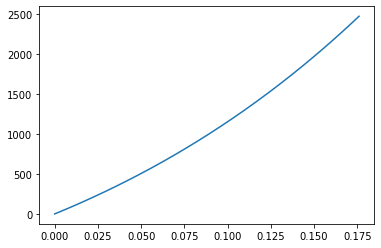

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

result.view(increments=0)#.get()
#print(result)
sigma = [np.average(s) for s in result.get('sigma').values()]
## epsilon = [np.average(e) for e in result.get('epsilon_V^-1(F_p)').values()]
epsilon = [np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
print(epsilon)
plt.plot(epsilon, sigma)


In [6]:
dict = {'inc':[],
    'Mises(Cauchy)':[],
    'Mises(ln(V))':[]
}
  
df = pd.DataFrame(dict)
  
display(df)


,inc,Mises(Cauchy),Mises(ln(V))


In [9]:
for increment in result.get().keys():
    newIncrement = {'inc': increment, 'Mises(Cauchy)': 90, 'Mises(ln(V))': 90}
    df = df.append(newIncrement, ignore_index = True)

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [10]:
display(df)

,inc,Mises(Cauchy),Mises(ln(V))
0,increment_0,90.0,90.0
1,increment_2,90.0,90.0
2,increment_4,90.0,90.0
3,increment_6,90.0,90.0
4,increment_8,90.0,90.0
5,increment_10,90.0,90.0
6,increment_12,90.0,90.0
7,increment_14,90.0,90.0
8,increment_16,90.0,90.0
9,increment_18,90.0,90.0
